In [26]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42567 sha256=1229415186fbf1b8a22776398c09c789b551ee1467ea54a71b98f7520b8f091f
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PRINCIPAL COMPONENT ANALYSIS

In [5]:
df=pd.read_csv("/content/Survey.csv")
df.head()

,City,Sex,Age,Occupation,Monthly Household Income,Income,Planning to Buy a new house,Time Frame,Reasons for buying a house,what type of House,...,4. Availability of domestic help,Time,Size,Budgets,Maintainances,EMI.1,ages,sex,Finished/Semi Finished.1,Influence Decision.1
0,Bangalore,M,26-35,Private Sector,"85,001 to105,000",95000,Yes,6M to 1Yr,Residing,Apartment,...,1,9,1200,72.5,30000,42500,30.5,M,Semifurnished,Site visits
1,Bangalore,M,46-60,Government/PSU,"45,001 to 65,000",55000,Yes,6M to 1Yr,Investment,Apartment,...,2,9,800,32.5,120,27500,53.0,M,Semifurnished,Newspaper
2,Bangalore,F,46-60,Government/PSU,"25,001 to 45,000",35000,Yes,<6 Months,Rental Income,Apartment,...,4,3,400,12.5,10000,10000,53.0,F,Semifurnished,Hoarding
3,Bangalore,M,36-45,Private Sector,>125000,200000,Yes,<6 Months,Investment,Apartment,...,5,3,1600,102.5,70000,80000,40.5,M,Furnished,Electronic/Internet
4,Bangalore,M,26-35,Self Employed,"85,001 to105,000",95000,Yes,1-2 Yr,Residing,Apartment,...,3,18,800,52.5,30000,42500,30.5,M,Semifurnished,Electronic/Internet


In [8]:
df.describe()

,Income,1.Proximity to city,2.Proximity to schools,3. Proximity to transport,4. Proximity to work place,5. Proximity to shopping,1. Gym/Pool/Sports facility,2. Parking space,3.Power back-up,4.Water supply,...,1. Builder reputation,2. Appreciation potential,3. Profile of neighbourhood,4. Availability of domestic help,Time,Size,Budgets,Maintainances,EMI.1,ages
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,99000.000000,3.628571,3.442857,4.071429,3.842857,2.628571,3.242857,3.528571,3.500000,3.914286,...,4.328571,4.171429,3.842857,3.142857,7.328571,1120.000000,64.142857,38001.714286,46107.142857,44.328571
std,59670.593345,0.870972,1.016326,0.728736,0.942333,0.783367,1.134897,0.696189,0.607919,0.675511,...,0.756066,0.613175,0.714969,0.982244,4.994842,627.301559,40.769069,26185.208291,22468.317929,12.956417
min,35000.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,1.000000,3.000000,300.000000,12.500000,120.000000,10000.000000,21.500000
25%,55000.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,3.000000,2.000000,3.000000,800.000000,32.500000,15000.000000,27500.000000,30.500000
50%,75000.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.500000,3.500000,4.000000,...,4.000000,4.000000,4.000000,3.000000,9.000000,800.000000,52.500000,30000.000000,42500.000000,40.500000
75%,115000.000000,4.000000,4.000000,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,4.000000,9.000000,1600.000000,87.500000,50000.000000,57500.000000,53.000000
max,200000.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,18.000000,4000.000000,150.000000,120000.000000,80000.000000,70.000000


In [18]:
print(df.isna().sum())
df.dropna(inplace=True)


City                                         0
Sex                                          0
Age                                          0
Occupation                                   0
Monthly Household Income                     0
Income                                       0
Planning to Buy a new house                  0
Time Frame                                   0
Reasons for buying a house                   0
what type of House                           0
Number of rooms                              0
Size of House                                0
Budget                                       0
Finished/Semi Finished                       0
Influence Decision                           0
Maintainance                                 0
EMI                                          0
1.Proximity to city                          0
2.Proximity to schools                       0
3. Proximity to transport                    0
4. Proximity to work place                   0
5. Proximity 

In [20]:
sur_int = df.iloc[:, 19:46]

scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

In [21]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sur_int_scaled)

# Display the explained variance by each component
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative explained variance:', np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio: [0.31822766 0.09526344 0.06889323 0.06341429 0.06111318]
Cumulative explained variance: [0.31822766 0.4134911  0.48238432 0.54579862 0.6069118 ]


In [22]:
pca_components = pd.DataFrame(pca.components_, columns=sur_int.columns)
print('PCA Components:\n', pca_components)


PCA Components:
    3. Proximity to transport  4. Proximity to work place  \
0                   0.014928                   -0.052653   
1                   0.126411                    0.060153   
2                  -0.465915                    0.052699   
3                   0.069723                   -0.592034   
4                   0.271472                   -0.097866   

   5. Proximity to shopping  1. Gym/Pool/Sports facility  2. Parking space  \
0                 -0.210212                    -0.180419         -0.203748   
1                 -0.270909                     0.089917          0.037004   
2                  0.129612                     0.015402          0.146867   
3                 -0.053158                    -0.081124         -0.056974   
4                  0.177992                     0.292307          0.182483   

   3.Power back-up  4.Water supply  5.Security  1. Exterior look   \
0        -0.155294       -0.203859   -0.196652          -0.219630   
1        -0.076

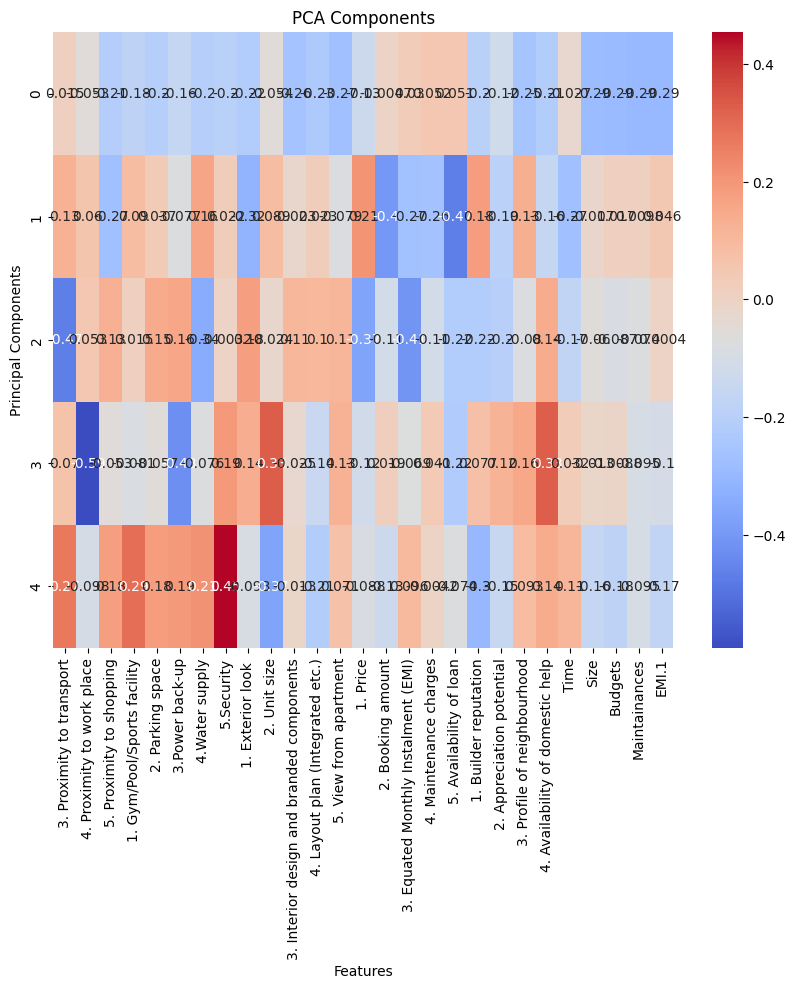

In [24]:
# Plot PCA biplot
plt.figure(figsize=(10, 8))
sns.heatmap(pca_components, annot=True, cmap='coolwarm')
plt.title('PCA Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

# FACTOR ANALYSIS

In [28]:
fa = FactorAnalyzer(n_factors=5, rotation='promax')
fa.fit(sur_int_scaled)


FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [29]:
# Get the loadings
loadings = fa.loadings_
print('Factor Loadings:\n', loadings)

Factor Loadings:
 [[-6.26497179e-02  5.34488634e-02  1.02690929e-01  5.66766288e-01
  -1.08953456e-01]
 [ 2.14466434e-01 -2.42324007e-01 -1.56117237e-02 -5.96429780e-02
   6.57571527e-01]
 [ 2.39691485e-02  6.46405981e-01  2.73362376e-01 -1.18424860e-01
   1.70156036e-01]
 [ 3.55079965e-02  4.97715527e-01 -1.23070175e-01  1.75301004e-01
   1.43681434e-01]
 [ 1.41554992e-01  4.58574262e-01 -1.52465992e-01 -3.40737336e-02
   1.44277328e-01]
 [ 3.38511394e-02  3.24155774e-01  2.58810626e-02 -1.00512053e-01
   5.58963375e-01]
 [ 3.34491869e-01  2.95377640e-01  3.23026318e-02  6.17495211e-01
   1.06282880e-01]
 [-2.47295401e-01  9.63297222e-01 -8.31312375e-02  3.19566596e-01
  -1.38278264e-01]
 [ 3.57561516e-01  4.13705708e-01  2.86870140e-01 -4.04234547e-01
  -1.26285943e-01]
 [ 3.07274317e-01 -8.66436390e-02 -9.66132292e-02 -3.99986060e-02
  -2.98122163e-01]
 [ 4.08980888e-01  3.85737783e-01 -4.60642249e-02 -1.09581501e-01
   1.03988257e-01]
 [ 5.74897487e-01  7.29136384e-02 -7.79075520e-

In [30]:
# Get the variance explained by each factor
variance = fa.get_factor_variance()
print('Factor Variance:\n', variance)

Factor Variance:
 (array([4.97928835, 3.6638373 , 1.99739684, 1.46935161, 1.31270193]), array([0.18441809, 0.13569768, 0.07397766, 0.05442043, 0.04861859]), array([0.18441809, 0.32011576, 0.39409343, 0.44851386, 0.49713245]))


In [31]:
fa_loadings = pd.DataFrame(loadings, index=sur_int.columns)
print('Factor Analysis Loadings:\n', fa_loadings)

Factor Analysis Loadings:
                                                   0         1         2  \
3. Proximity to transport                 -0.062650  0.053449  0.102691   
4. Proximity to work place                 0.214466 -0.242324 -0.015612   
5. Proximity to shopping                   0.023969  0.646406  0.273362   
1. Gym/Pool/Sports facility                0.035508  0.497716 -0.123070   
2. Parking space                           0.141555  0.458574 -0.152466   
3.Power back-up                            0.033851  0.324156  0.025881   
4.Water supply                             0.334492  0.295378  0.032303   
5.Security                                -0.247295  0.963297 -0.083131   
1. Exterior look                           0.357562  0.413706  0.286870   
2. Unit size                               0.307274 -0.086644 -0.096613   
3. Interior design and branded components  0.408981  0.385738 -0.046064   
4. Layout plan (Integrated etc.)           0.574897  0.072914 -0.077908  

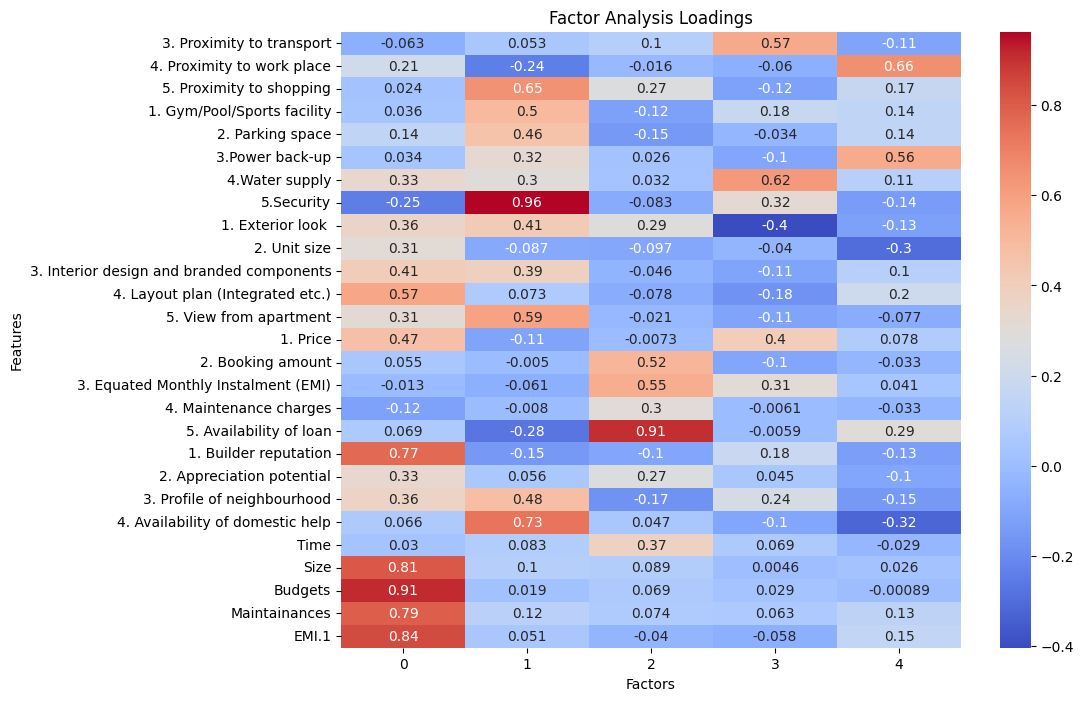

In [32]:
# Plot Factor Analysis loadings
plt.figure(figsize=(10, 8))
sns.heatmap(fa_loadings, annot=True, cmap='coolwarm')
plt.title('Factor Analysis Loadings')
plt.xlabel('Factors')
plt.ylabel('Features')
plt.show()